In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import random
from sklearn.mixture import GaussianMixture

In [ ]:
def draw_pdf(x, c):
  y = ((1 / (np.sqrt(2 * np.pi) * c['std'])) *
     np.exp(-0.5 * (1 / c['std'] * (x - c['mean']))**2))
  
  plt.plot(np.arange(0, 2, 2/len(y)), y, '--', color ='black', \
           label="mu:{}, std:{}".format(c['mean'], c['std']))

## Modelling the heights (in Meters) of students in a school
(Note: we only consider population from the following grades)


1.   Grade 5
2.   Grade 6, and 
3.   Grade 10 

### Data sampling by initializing parameters

In [ ]:
# grade 5
c5 = {'mean': 1.05, 'std': 0.06}
# grade 6
c6 = {'mean': 1.3, 'std': 0.07}
# grade 10
c10 = {'mean': 1.6, 'std': 0.06}

In [ ]:
samples_per_g = 100000
g1 = np.random.normal(c5['mean'], c5['std'], samples_per_g)
g2 = np.random.normal(c6['mean'], c6['std'], samples_per_g)
g3 = np.random.normal(c10['mean'], c10['std'], samples_per_g)

### Concatenate data  into a single array

In [ ]:
gs = np.concatenate([g1, g2, g3], axis=0)
gs.shape

(300000,)

### Display distributions

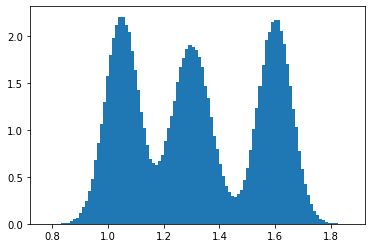

In [ ]:
count, bins, ignored = plt.hist(gs, 100, density=True)

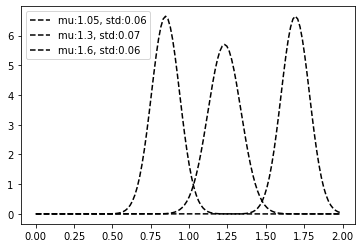

In [ ]:
x = np.arange(0.5, 1.8, 0.01)
draw_pdf(x, c5)
draw_pdf(x, c6)
draw_pdf(x, c10)
plt.legend()

### Lets run GMM on this data


*  Remember, we are only passing our data array here
*  No other info (such as the parameters that we used to generate our data)



In [ ]:
# shuffling to change the order in our data
random.shuffle(gs)

In [ ]:
gm = GaussianMixture(n_components=3, random_state=0)
gm.fit(gs.reshape((len(gs), 1)))

GaussianMixture(n_components=3, random_state=0)

In [ ]:
# display the mean
gm.means_

array([[1.5994892 ],
       [1.05111166],
       [1.30084541]])

In [ ]:
# the covariance
np.sqrt(gm.covariances_)

array([[[0.06080563]],

       [[0.0612551 ]],

       [[0.06728971]]])

### Run some queries

In [ ]:
query_value = 0.9
gm.predict([[query_value]]), gm.predict_proba([[query_value]])

(array([1]), array([[3.84402411e-28, 9.99999636e-01, 3.64215292e-07]]))

In [ ]:
query_value = 1.2
gm.predict([[query_value]]), gm.predict_proba([[query_value]])

(array([2]), array([[1.24787998e-09, 1.53739807e-01, 8.46260192e-01]]))

In [ ]:
query_value = 1.7
gm.predict([[query_value]]), gm.predict_proba([[query_value]])

(array([0]), array([[9.99999921e-01, 1.68439018e-24, 7.91779807e-08]]))

## 2D - case

In [ ]:
# parameter initialization
c21 = {'mean': np.array([1.0, 1.0]), 'cov': np.array([[0.5, 0], [0, 0.25]])}
c22 = {'mean': np.array([4.0, 4.0]), 'cov': np.array([[0.15, 0], [0, 0.5]])}

In [ ]:
# sampling
n = 1000
d12 = np.random.multivariate_normal(c21['mean'], c21['cov'], n)
d22 = np.random.multivariate_normal(c22['mean'], c22['cov'], n)
d2d = np.concatenate([d12, d22], axis=0)
d2d.shape

(2000, 2)

In [ ]:
# model fitting
gm2d = GaussianMixture(n_components=2, random_state=0)
gm2d.fit(d2d)

GaussianMixture(n_components=2, random_state=0)

In [ ]:
# display the mean
gm2d.means_

array([[0.96073292, 1.00252998],
       [3.98579479, 4.00152191]])

In [ ]:
# the covariance
gm2d.covariances_

array([[[0.53083182, 0.01271364],
        [0.01271364, 0.27717312]],

       [[0.15261928, 0.00465289],
        [0.00465289, 0.50567077]]])

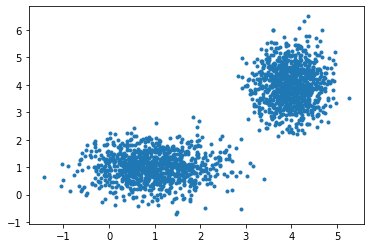

In [ ]:
# scatter plot
plt.scatter(d2d[:, 0], d2d[:, 1], marker=".")